<a href="https://colab.research.google.com/github/kunalshenoy1604/College-B.Tech/blob/main/FetalHealthAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [506]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [507]:
df=pd.read_csv("/content/drive/MyDrive/fetal_health.csv")
df.head(15)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [508]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [509]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [510]:
df.shape

(2126, 22)

In [511]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [512]:
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [513]:
df.cov()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,96.842216,-3.064547e-03,-1.535508e-02,-4.243626e-03,-4.632750e-03,-3.017741e-05,-6.072470e-04,51.699944,-2.430296,51.710615,...,105.194187,48.580514,-3.306851,-0.032966,114.293644,110.965926,112.359840,-38.194365,1.764270e+00,0.895720
accelerations,-0.003065,1.494279e-05,8.701087e-06,1.021237e-06,-1.242874e-06,-9.528416e-09,-2.913302e-07,-0.018581,0.000707,-0.026593,...,-0.017630,0.027340,0.002171,-0.000017,0.015426,0.016295,0.015258,0.014081,6.710531e-05,-0.000865
fetal_movement,-0.015355,8.701087e-06,2.177701e-03,-9.455754e-06,6.800456e-06,-2.934824e-08,7.320941e-06,-0.083213,0.005000,-0.063611,...,-0.212322,0.083615,0.022662,-0.000585,-0.046778,-0.065253,-0.048829,0.242515,-4.393736e-05,0.002523
uterine_contractions,-0.004244,1.021237e-06,-9.455754e-06,8.679323e-06,2.486168e-06,1.145924e-09,1.338908e-07,-0.011792,0.000754,-0.016618,...,-0.009869,0.006490,0.000719,0.000120,-0.005060,-0.008614,-0.005979,0.020368,-1.301314e-04,-0.000371
light_decelerations,-0.004633,-1.242874e-06,6.800456e-06,2.486168e-06,8.762835e-06,1.824647e-08,3.940003e-07,-0.006064,0.001470,-0.014774,...,-0.048437,0.011582,0.003472,0.000492,-0.016838,-0.024343,-0.016641,0.048405,1.294892e-07,0.000107
severe_decelerations,-0.000030,-9.528416e-09,-2.934824e-08,1.145924e-09,1.824647e-08,3.283272e-09,4.190139e-10,0.000033,0.000002,-0.000032,...,-0.000122,-0.000022,0.000001,0.000002,-0.000202,-0.000142,-0.000133,0.000227,-2.466936e-06,0.000005
prolongued_decelerations,-0.000607,-2.913302e-07,7.320941e-06,1.338908e-07,3.940003e-07,4.190139e-10,3.480381e-07,0.000469,0.000139,-0.001491,...,-0.004826,0.001273,0.000388,0.000024,-0.004218,-0.004495,-0.003796,0.008604,-7.762249e-05,0.000176
abnormal_short_term_variability,51.699944,-1.858083e-02,-8.321266e-02,-1.179214e-02,-6.064151e-03,3.344430e-05,4.688606e-04,295.592844,-6.540429,145.309543,...,139.953491,-34.493396,-8.496738,-1.812331,16.437408,19.987681,29.836657,-72.954367,-6.036390e-02,4.977125
mean_value_of_short_term_variability,-2.430296,7.073292e-04,5.000233e-03,7.537698e-04,1.469837e-03,1.727298e-06,1.391302e-04,-6.540429,0.780115,-7.641182,...,-16.254537,6.483402,1.306234,0.165997,-4.450356,-6.134473,-4.294633,14.226624,-3.568296e-02,-0.056100
percentage_of_time_with_abnormal_long_term_variability,51.710615,-2.659289e-02,-6.361143e-02,-1.661767e-02,-1.477366e-02,-3.243606e-05,-1.490506e-03,145.309543,-7.641182,338.445182,...,229.943960,-93.483633,-15.154713,-1.581883,49.788875,63.777899,49.629855,-150.086382,4.773761e-01,4.816570


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [515]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [516]:
df.duplicated().sum()

13

In [517]:
df = df.drop_duplicates()
df.head(15)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


<Axes: >

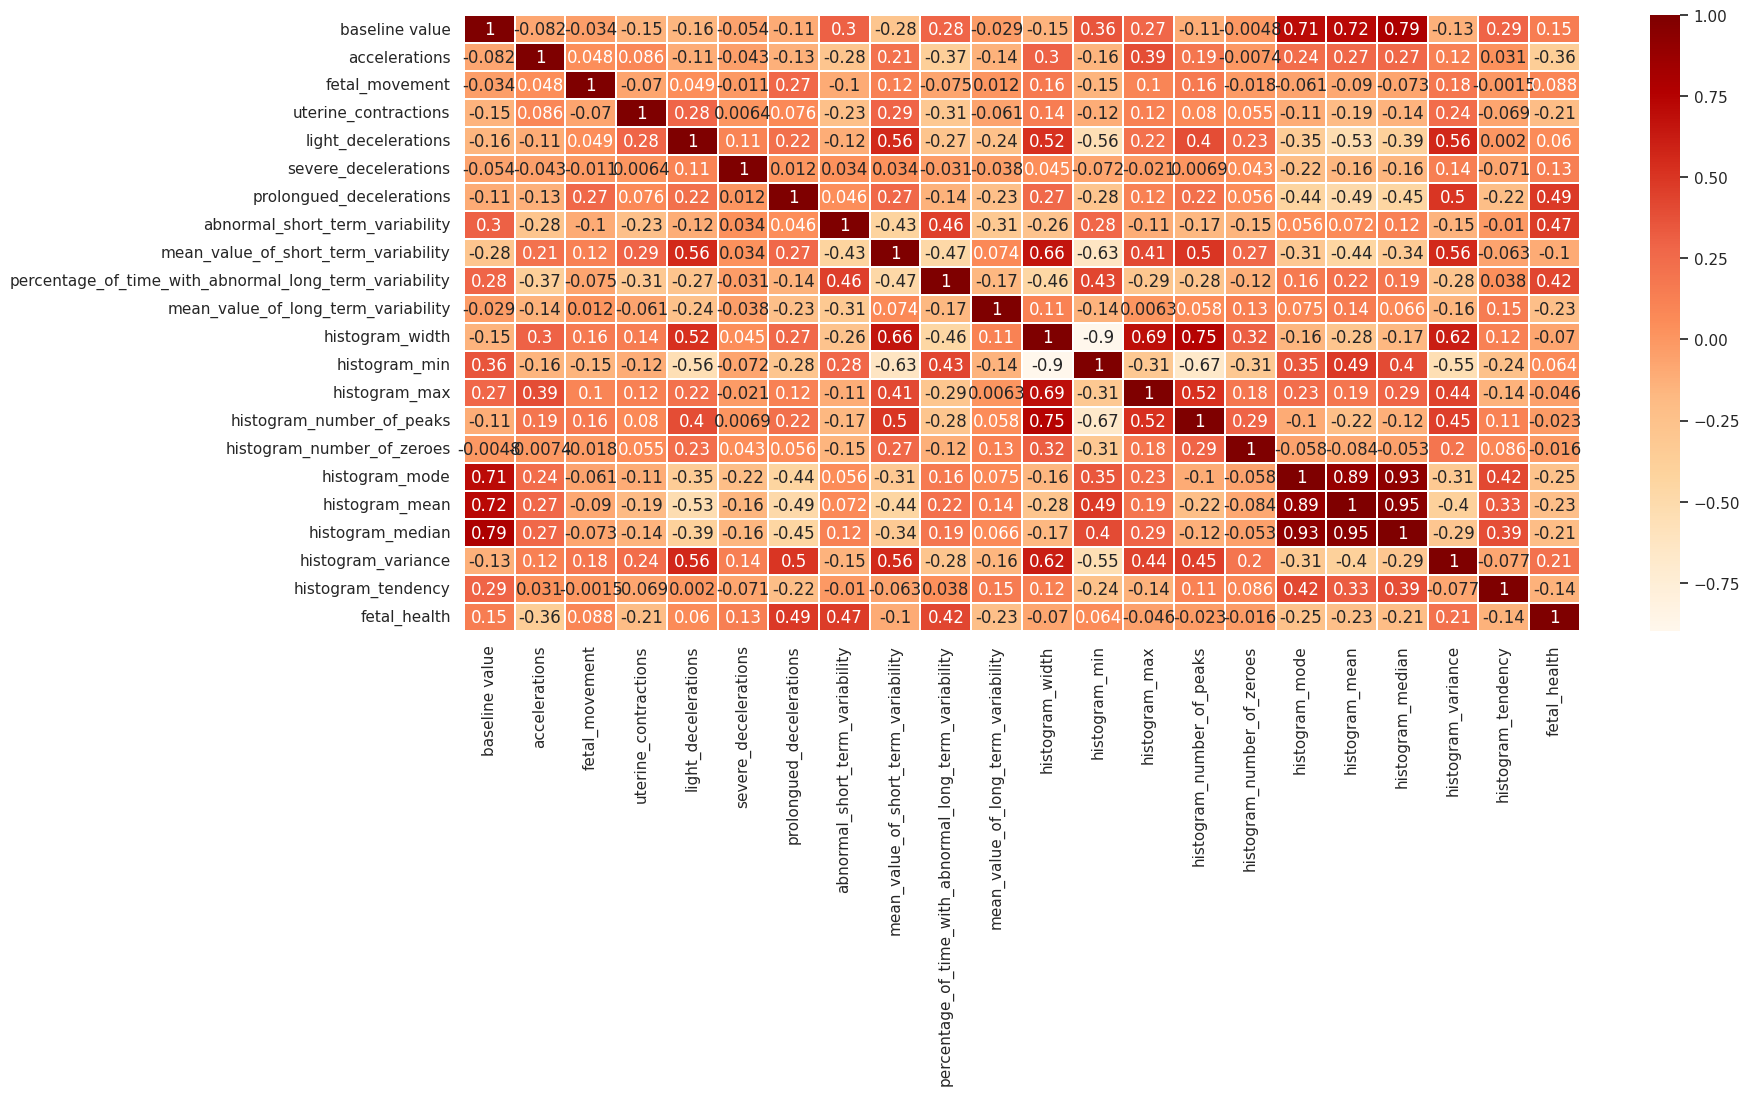

In [518]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),cmap="OrRd", annot=True,linewidth=1.22, linecolor="white",cbar=True)

<Axes: >

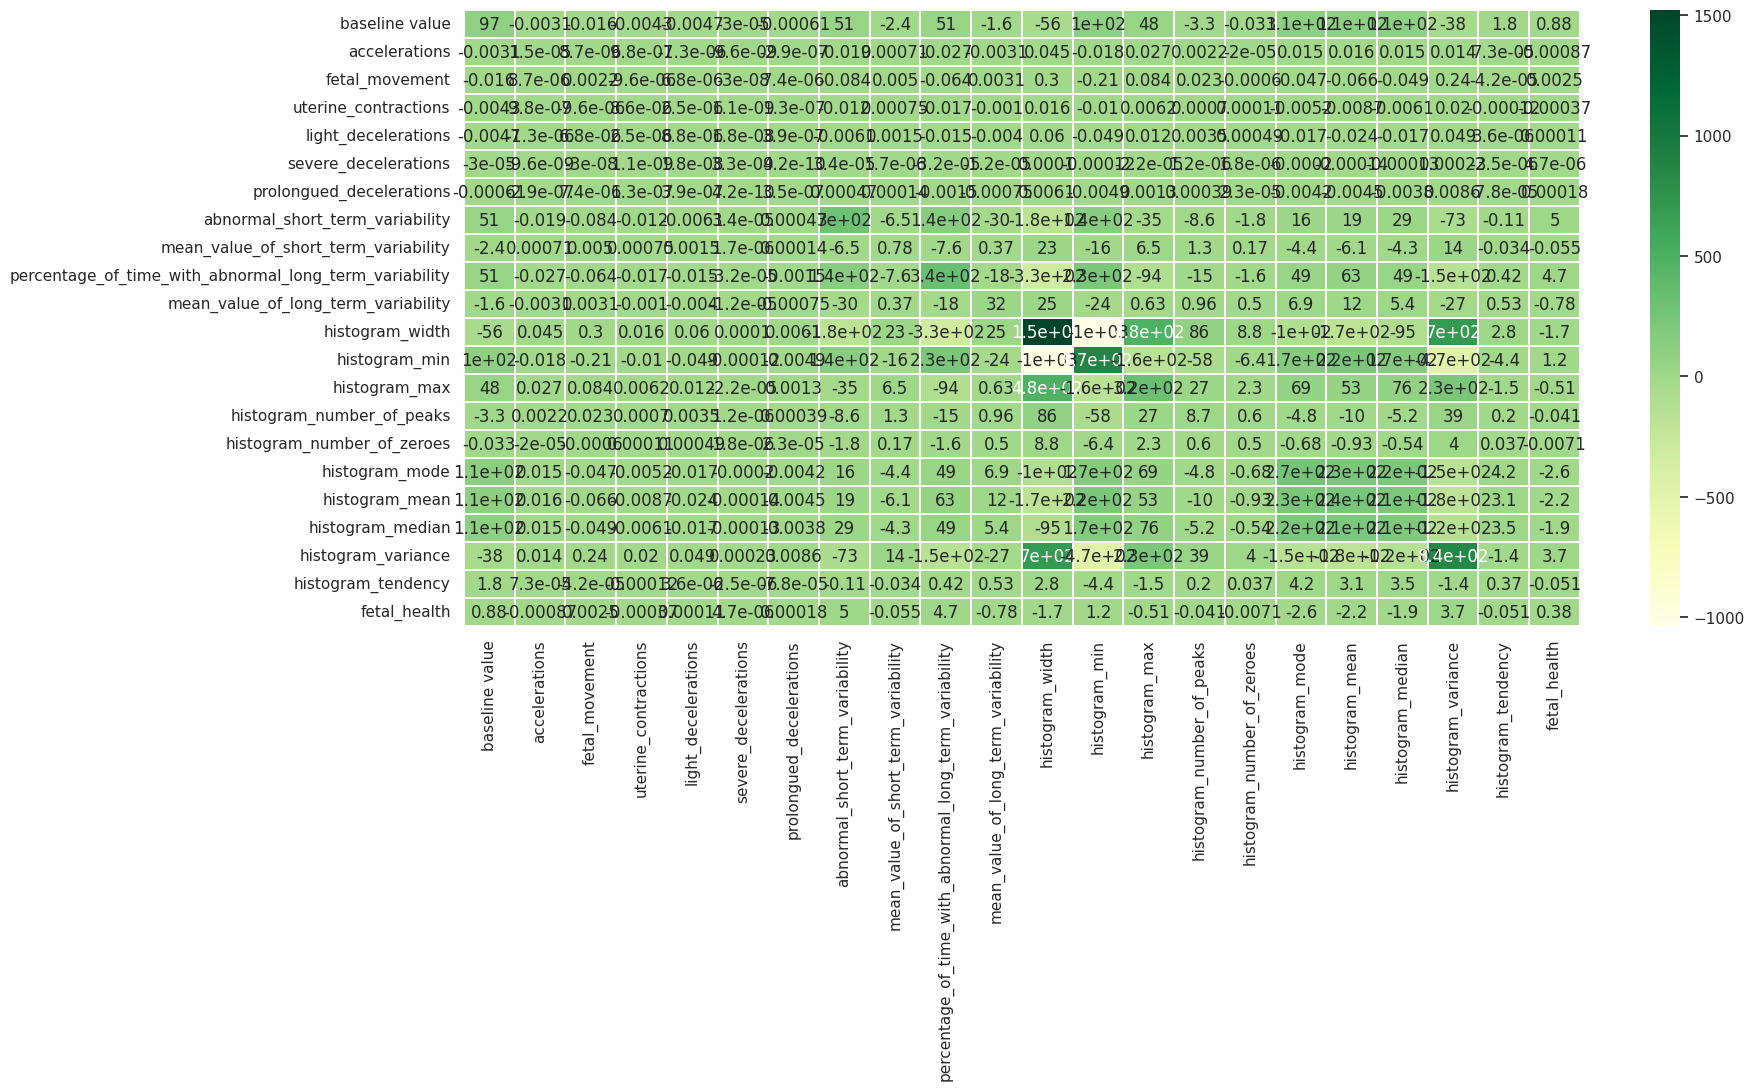

In [519]:
plt.figure(figsize=(18,8))
sns.heatmap(df.cov(),cmap="YlGn", annot=True,linewidth=1.22, linecolor="white",cbar=True)

In [520]:
X = df.drop(columns='fetal_health')
y = df['fetal_health']


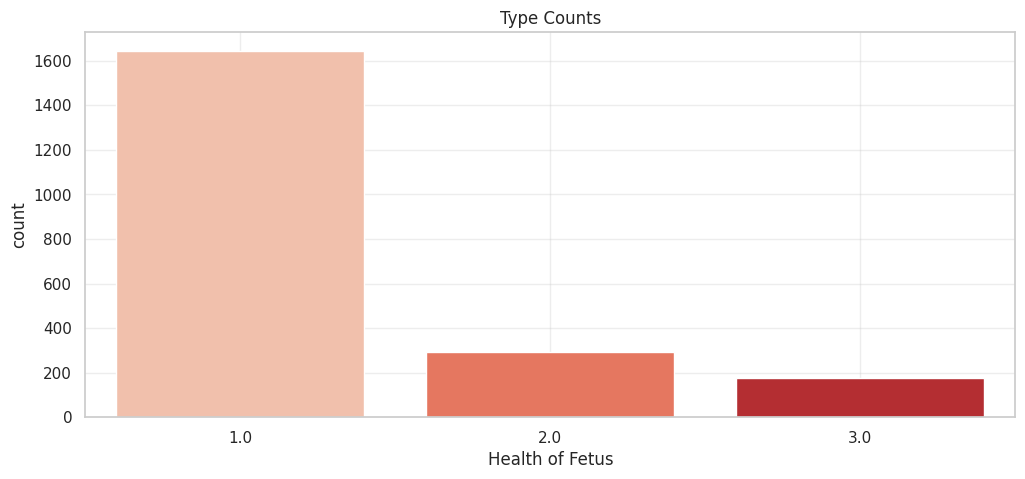

In [521]:
plt.figure(figsize=(12, 5))
sns.countplot(df, x="fetal_health", palette='Reds')
plt.title('Type Counts')
plt.xlabel('Health of Fetus')
plt.grid(alpha=0.35)
plt.show()

In [522]:
ValueCounts=df['fetal_health'].value_counts()
ValueCounts

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45 )

SUPPORT VECTOR CLASSIFIER ANALYSIS

In [524]:
svc_model = SVC(kernel = 'linear', random_state=3)
svc_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=3)

In [525]:
y_pred = svc_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy (SVC) :',accuracy)

Accuracy (SVC) : 0.900709219858156


In [526]:
precision = precision_score(y_test, y_pred,average='weighted')
print("Precision (Support Vector Classifier) :",precision)

Precision (Support Vector Classifier) : 0.8942825020983679


In [527]:
recall = recall_score(y_test, y_pred,average='weighted')
print("Recall (Support Vector Classifier)",recall)

Recall (Support Vector Classifier) 0.900709219858156


In [528]:
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 Score (Support Vector Classifier)",f1)

F1 Score (Support Vector Classifier) 0.8930201176829309


In [529]:
classification_report_SVC=classification_report(y_pred,y_test)
print(classification_report_SVC)

              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       358
         2.0       0.53      0.76      0.63        41
         3.0       0.71      0.92      0.80        24

    accuracy                           0.90       423
   macro avg       0.74      0.86      0.79       423
weighted avg       0.92      0.90      0.91       423



In [530]:
scaler=StandardScaler()
X_train_SCALED= scaler.fit_transform(X_train)
X_test_SCALED= scaler.fit_transform(X_test)

LOGISTIC REGRESSION ANALYSIS

In [531]:
Logistic_Regression_classifier = LogisticRegression()
Logistic_Regression_classifier.fit(X_train_SCALED, y_train)
y_pred_logistic_regression = Logistic_Regression_classifier.predict(X_test_SCALED)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [532]:
accuracy=accuracy_score(y_pred_logistic_regression,y_test)
print('Accuracy (Logistic Regression) :',accuracy)

Accuracy (Logistic Regression) : 0.9196217494089834


In [533]:
precision=precision_score(y_pred_logistic_regression,y_test,average='weighted')
print('Precision (Logistic Regression) :',precision)

Precision (Logistic Regression) : 0.920679708121368


In [534]:
recall=recall_score(y_pred_logistic_regression,y_test,average='weighted')
print('Recall (Logistic Regression) :',recall)

Recall (Logistic Regression) : 0.9196217494089834


In [535]:
f1=f1_score(y_pred_logistic_regression,y_test,average='weighted')
print('F1 Score (Logistic Regression) :',f1)

F1 Score (Logistic Regression) : 0.9201027708234567


In [536]:
classification_report_LR=classification_report(y_pred_logistic_regression,y_test)
print(classification_report_LR)

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       335
         2.0       0.71      0.73      0.72        56
         3.0       0.90      0.88      0.89        32

    accuracy                           0.92       423
   macro avg       0.86      0.85      0.85       423
weighted avg       0.92      0.92      0.92       423



DECISION TREE ANALYSIS

In [537]:
Decision_tree_classifier=DecisionTreeClassifier(max_depth = 7)
Decision_tree_classifier.fit(X_train_SCALED,y_train)
y_pred_decision_tree=Decision_tree_classifier.predict(X_test_SCALED)

In [538]:
accuracy=accuracy_score(y_pred_decision_tree,y_test)
print('Accuracy (Decision Tree) :',accuracy)

Accuracy (Decision Tree) : 0.9243498817966903


In [539]:
precision=precision_score(y_pred_decision_tree,y_test,average='weighted')
print('Precision (Decision Tree) :',precision)

Precision (Decision Tree) : 0.9267251752303659


In [540]:
recall=recall_score(y_pred_decision_tree,y_test,average='weighted')
print('Recall (Decision Tree) :',recall)

Recall (Decision Tree) : 0.9243498817966903


In [541]:
f1=f1_score(y_pred_decision_tree,y_test,average='weighted')
print('F1 Score (Decision Tree) :',f1)

F1 Score (Decision Tree) : 0.9253911966677925


In [542]:
classification_report_DT=classification_report(y_pred_decision_tree,y_test)
print(classification_report_DT)

              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       338
         2.0       0.71      0.76      0.73        54
         3.0       0.97      0.97      0.97        31

    accuracy                           0.92       423
   macro avg       0.88      0.89      0.88       423
weighted avg       0.93      0.92      0.93       423



RANDOM FOREST CLASSIFIERS

In [543]:
Random_Forest_Classifier=RandomForestClassifier(n_estimators=100)
Random_Forest_Classifier.fit(X_train_SCALED, y_train)
y_pred_random_forest=Random_Forest_Classifier.predict(X_test_SCALED)

In [544]:
accuracy=accuracy_score(y_pred_random_forest,y_test)
print('Accuracy (Random Forest Classifiers) :',accuracy)

Accuracy (Random Forest Classifiers) : 0.9408983451536643


In [545]:
precision = precision_score(y_pred_random_forest,y_test, average='weighted')
print("Precision (Random Forest Classifiers) :",precision)

Precision (Random Forest Classifiers) : 0.9500916515961049


In [546]:
recall = recall_score(y_pred_random_forest,y_test, average='weighted')
print("Recall (Random Forest Classifiers) :",recall)

Recall (Random Forest Classifiers) : 0.9408983451536643


In [547]:
f1=f1_score(y_pred_random_forest,y_test,average='weighted')
print("F1 scores (Random Forest Classifiers) :",f1)

F1 scores (Random Forest Classifiers) : 0.9436706394632879


In [548]:
classification_report_RFC=classification_report(y_pred_random_forest,y_test)
print(classification_report_RFC)

              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       349
         2.0       0.71      0.91      0.80        45
         3.0       0.87      0.93      0.90        29

    accuracy                           0.94       423
   macro avg       0.86      0.93      0.89       423
weighted avg       0.95      0.94      0.94       423



K-NEIGHBOURS ANALYSIS

In [549]:
k_neigbours_classifier = KNeighborsClassifier()
k_neigbours_classifier.fit(X_train_SCALED,y_train)
y_pred_k_neigbours_classifier = k_neigbours_classifier.predict(X_test_SCALED)

In [550]:
accuracy=accuracy_score(y_pred_k_neigbours_classifier,y_test)
print('Accuracy (K-Neigbours) :',accuracy)

Accuracy (K-Neigbours) : 0.8959810874704491


In [551]:
precision = precision_score(y_pred_k_neigbours_classifier,y_test, average='weighted')
print("Precision (K-Neigbours) :",precision)

Precision (K-Neigbours) : 0.9059319885304532


In [552]:
recall = recall_score(y_pred_k_neigbours_classifier,y_test, average='weighted')
print("Recall (K-Neigbours) :",recall)

Recall (K-Neigbours) : 0.8959810874704491


In [553]:
f1=f1_score(y_pred_k_neigbours_classifier,y_test,average='weighted')
print("F1 scores (K-Neigbours) :",f1)

F1 scores (K-Neigbours) : 0.8997260384644394


In [554]:
classification_report_KN=classification_report(y_pred_k_neigbours_classifier,y_test)
print(classification_report_KN)

              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95       347
         2.0       0.60      0.67      0.64        52
         3.0       0.68      0.88      0.76        24

    accuracy                           0.90       423
   macro avg       0.75      0.83      0.78       423
weighted avg       0.91      0.90      0.90       423



GRADIENT BOOSTING ANALYSIS

In [555]:
GradientBoosting=GradientBoostingClassifier(random_state=3, n_estimators=525, max_depth = 10)
GradientBoosting.fit(X_train_SCALED,y_train)
y_pred_GradientBoosting = GradientBoosting.predict(X_test_SCALED)

In [556]:
accuracy=accuracy_score(y_pred_GradientBoosting,y_test)
print('Accuracy (GradientBoosting) :',accuracy)

Accuracy (GradientBoosting) : 0.9550827423167849


In [557]:
precision = precision_score(y_pred_GradientBoosting,y_test, average='weighted')
print("Precision (GradientBoosting) :",precision)

Precision (GradientBoosting) : 0.9591701189641795


In [558]:
recall = recall_score(y_pred_GradientBoosting,y_test, average='weighted')
print("Recall (GradientBoosting) :",recall)

Recall (GradientBoosting) : 0.9550827423167849


In [559]:
f1 = f1_score(y_pred_GradientBoosting,y_test, average='weighted')
print("F1 score (GradientBoosting) :",f1)

F1 score (GradientBoosting) : 0.9563274607480554


In [560]:
classification_report_GB=classification_report(y_pred_GradientBoosting,y_test)
print(classification_report_GB)

              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       344
         2.0       0.79      0.92      0.85        50
         3.0       0.90      0.97      0.93        29

    accuracy                           0.96       423
   macro avg       0.89      0.95      0.92       423
weighted avg       0.96      0.96      0.96       423



NAIVE BAYES CLASSIFIER


In [561]:
Naive_Bayes_Classifier=GaussianNB()
Naive_Bayes_Classifier.fit(X_train_SCALED,y_train)
y_pred_NB=Naive_Bayes_Classifier.predict(X_test_SCALED)

In [562]:
accuracy = accuracy_score(y_test, y_pred_NB)
print("Accuracy (Naive Bayes) :",accuracy)

Accuracy (Naive Bayes) : 0.8226950354609929


In [563]:
precision = precision_score(y_test, y_pred_NB,average='weighted',zero_division=0)
print("Precision (Naive Bayes) :",precision)

Precision (Naive Bayes) : 0.7174697087087575


In [564]:
recall = recall_score(y_test, y_pred_NB,average='weighted')
print("Recall (Naive Bayes)",recall)

Recall (Naive Bayes) 0.8226950354609929


In [565]:
f1 = f1_score(y_test, y_pred_NB,average='weighted')
print("F1 score (Naive Bayes)",f1)

F1 score (Naive Bayes) 0.7650612386638351


In [566]:
classification_report_NB=classification_report(y_test, y_pred_NB,zero_division=0)
print(classification_report_NB)

              precision    recall  f1-score   support

         1.0       0.86      0.96      0.90       334
         2.0       0.00      0.00      0.00        58
         3.0       0.57      0.90      0.70        31

    accuracy                           0.82       423
   macro avg       0.48      0.62      0.53       423
weighted avg       0.72      0.82      0.77       423



ENSEMBLE LEARNING

In [567]:
Logistic_Regression_classifier = LogisticRegression()
Support_Vector_Machine = SVC(probability=True)
Random_Forest_Classifier = RandomForestClassifier()
Gradient_Boosting_Classifier = GradientBoostingClassifier()
KNeighbors_Classifier = KNeighborsClassifier()
Decision_Tree_Classifier = DecisionTreeClassifier()
#Naive_Bayes_Classifier = GaussianNB()


In [568]:
ensemble = VotingClassifier(
    estimators=[
        ('LRC', Logistic_Regression_classifier),
        ('SVM', Support_Vector_Machine),
        #('RFC', Random_Forest_Classifier),
        #('GBC', Gradient_Boosting_Classifier),
        ('KNC', KNeighbors_Classifier),
        ('DTC', Decision_Tree_Classifier),
       #('NB', Naive_Bayes_Classifier)  WILL NOT USE SINCE IT REDUCES ACCURACY RATE
    ],
    voting='soft'
)

In [569]:
ensemble.fit(X_train_SCALED, y_train)
ensemble_predictions = ensemble.predict(X_test_SCALED)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [570]:
accuracy = accuracy_score(y_test, ensemble_predictions)
accuracy

0.933806146572104

In [571]:
precision = precision_score(y_test, ensemble_predictions,average='weighted')
precision

0.9312606520424431

In [572]:
recall = recall_score(y_test, ensemble_predictions,average='weighted')
recall

0.933806146572104

In [573]:
f1 = f1_score(y_test, ensemble_predictions,average='weighted')
f1

0.9317290071929291

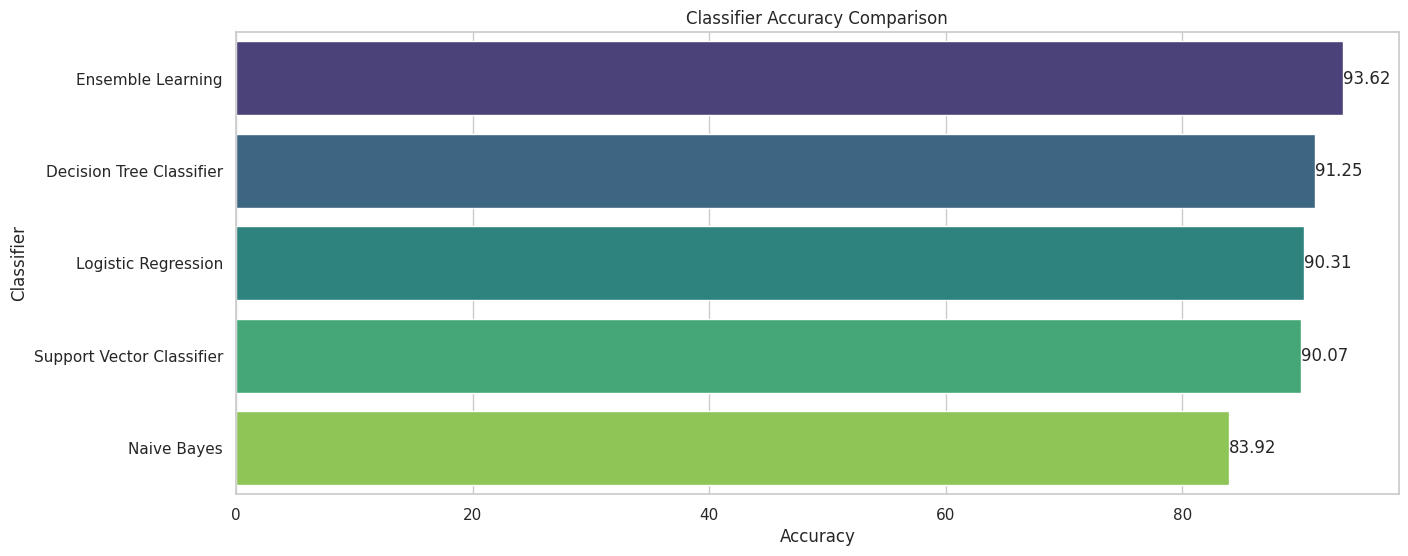

In [574]:
accuracies = [93.617, 91.2529, 90.3073, 90.0709, 83.9243]
classifiers = ["Ensemble Learning", "Decision Tree Classifier", "Logistic Regression" ,"Support Vector Classifier", "Naive Bayes"]
data = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accuracies})

plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
ax=sns.barplot(x='Accuracy', y='Classifier', data=data, palette="viridis")

plt.xlabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), ha="left", va="center")

plt.show()

